<a href="https://colab.research.google.com/github/sammyGuru/Marvel-Level-1/blob/main/linearregressionscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#consider the trend in the dependent variable wrt independent variable. We need to get a point that passes through most of the points. The Ordinary Least Squares process is used to get a line such that the errors, the distance between the point and the lin(error) is least. Use this line to predict the dependent variable wrt to a given independent variable

In [ ]:
#remove outliers to prevent the line from getting deviated to a point that lies far away from most of the observations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/brainsize.txt")#using the head size and brain weight
print(df.shape)
print(df)

(237, 4)
     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [ ]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

x_mean = np.mean(X)
y_mean = np.mean(Y)

n = len(X)#total number of values
num = 0
den = 0
for i in range(n):
  num += (X[i]-x_mean)*(Y[i]-y_mean)
  den += (X[i] - x_mean) **2
b1 = num / den
b0 = y_mean - (b1*x_mean)

print(b1,b0)#where b1 is bias coeeficient(c), m is scale factor in y = mx+c, gives the line of that passes through most of the points
#that best fits the data points, minimizing the difference between the observed and predicted values of the dependent variable.

0.26342933948939945 325.57342104944223


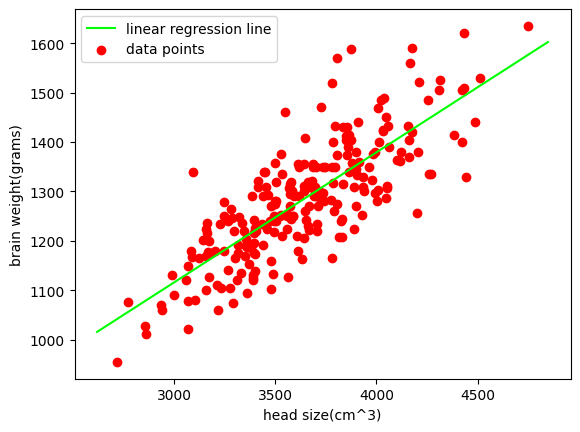

In [ ]:
x_max = np.max(X) +100
x_min = np.min(X) - 100

x = np.linspace(x_min, x_max, 1000)
y = b0 + x*b1

plt.plot(x,y,color = '#00ff00', label = 'linear regression line')

plt.scatter(X,Y,color = '#ff0000', label = 'data points')

plt.xlabel('head size(cm^3)')
plt.ylabel('brain weight(grams)')

plt.legend()
plt.show()

In [ ]:
#to check the accuracy- rms and r-squared method
rmse = 0
for i in range(n):
  y_pred = b0 + b1*X[i]
  rmse += (Y[i] - y_pred)**2
rmse = np.sqrt(rmse/n)
print(rmse)


72.1206213783709


In [ ]:
#r-squared
sumofres = 0
totalsum = 0
for i in range(n):
  y_pred = b0 + X[i]*b1
  sumofres += (Y[i] - y_pred)**2
  totalsum += (Y[i] - y_mean)**2
score = 1-(sumofres/totalsum)
print(score)

0.6393117199570003
